You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.



Start with profit analysis

average profit per km

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


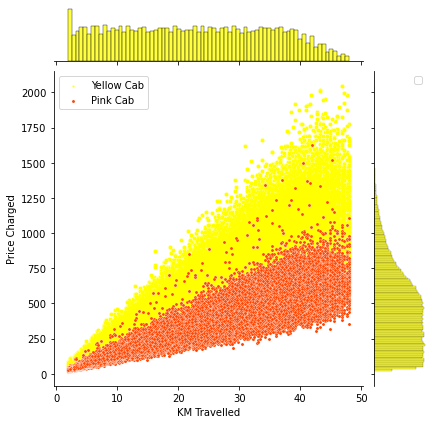

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('Cab_Data.csv')

pink_d=df[df.values  == "Pink Cab"]
pink_profits_perkm = (pink_d[["Price Charged"]].to_numpy()-  pink_d[["Cost of Trip"]].to_numpy())/pink_d[["KM Travelled"]].to_numpy()
yellow_d=df[df.values  == "Yellow Cab"]



gf1 = sns.jointplot(data=yellow_d, x="KM Travelled", y="Price Charged", s=20, color='yellow')



gf1.x = pink_d["KM Travelled"]
gf1.y = pink_d["Price Charged"]

#scatter plot of yellow company
gf1.ax_joint.scatter(data=yellow_d, x="KM Travelled", alpha=.9, y="Price Charged", c='yellow', marker='o',label='Yellow Cab',
                       s=1)
#scatter plot of pink company
gf1.plot_joint(sns.scatterplot, color='orangered', alpha=1, label='Pink Cab', marker='o', s=10)
'''
gf.ax_joint.errorbar(x, y, yerr=y_errors, fmt='--', color='red',
                     ecolor='lightgray', elinewidth=0.001, capsize=0)
                     '''


plt.legend() 
plt.show()


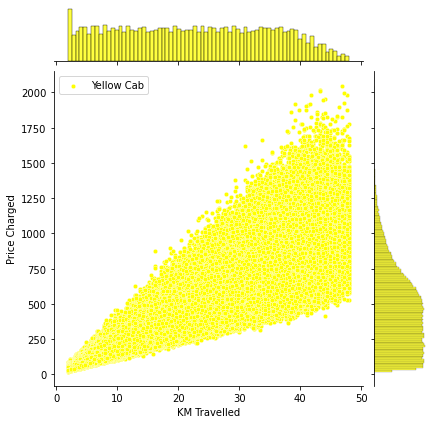

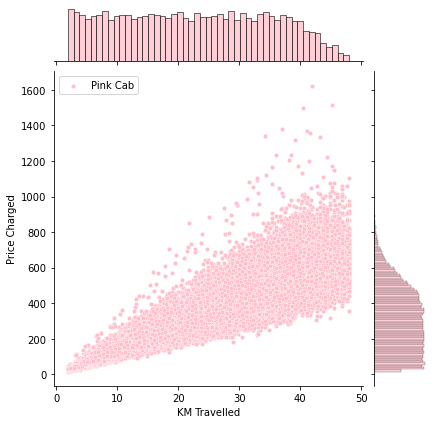

In [230]:

gf_yellow = sns.jointplot(data=yellow_d, x="KM Travelled", y="Price Charged", s=20, color='yellow', label="Yellow Cab")
gf_pink = sns.jointplot(data=pink_d, x="KM Travelled", y="Price Charged", s=20, color='pink', label="Pink Cab")


profit analysis

profit analysis by year


 January 01 2016 is the serial number 42370
 January 01 2017 is the serial number 42735
 January 01 2018 is the serial number 43101
 
 Stacked bar chart reference:https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labeplot(kind='bar'%20ls
 
 A = [45, 17, 47]
B = [91, 70, 72]

 
     A   B  
C1  45  91  
C2  17  70  
C3  47  72  

In [232]:
"""
Total rides

"""

y_tot=len(yellow_d)
print(y_tot)

p_tot=len(pink_d)
print(p_tot)

"""
Total profits

"""
yellow_p= np.sum((yellow_d[["Price Charged"]].to_numpy()-  yellow_d[["Cost of Trip"]].to_numpy()))
pink_p= np.sum((pink_d[["Price Charged"]].to_numpy()-  pink_d[["Cost of Trip"]].to_numpy()))

print(f"yellow total profit is:{yellow_p} and pink profit is:{pink_p}")



#drop values 

## delete all rows with column 'Age' has value 30 to 40 
#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index
#dfObj.drop(indexNames , inplace=True)
y_16=yellow_d[~(yellow_d['Date of Travel'] >= 42735)]  
y_17=yellow_d[~(yellow_d['Date of Travel'] < 42735)] #drop 2016 dates
y_17=y_17[~(y_17['Date of Travel'] > 43101)] #drop dates beyond 01/01/2018
y_18=yellow_d[~(yellow_d['Date of Travel'] < 43101)]  #drop dates below 01/01/2018


p_16=pink_d[~(pink_d['Date of Travel'] >= 42735)]  
p_17=pink_d[~(pink_d['Date of Travel'] < 42735)] #drop 2016 dates
p_17=p_17[~(p_17['Date of Travel'] > 43101)] #drop dates beyond 01/01/2018
p_18=pink_d[~(pink_d['Date of Travel'] < 43101)]  #drop dates below 01/01/2018

#profits per km by year

y_p_16 = np.mean((y_16[["Price Charged"]].to_numpy()-  y_16[["Cost of Trip"]].to_numpy())/y_16[["KM Travelled"]].to_numpy())
y_p_17 = np.mean((y_17[["Price Charged"]].to_numpy()-  y_17[["Cost of Trip"]].to_numpy())/y_17[["KM Travelled"]].to_numpy())
y_p_18 = np.mean((y_18[["Price Charged"]].to_numpy()-  y_18[["Cost of Trip"]].to_numpy())/y_18[["KM Travelled"]].to_numpy())


p_p_16 = np.mean((p_16[["Price Charged"]].to_numpy()-  p_16[["Cost of Trip"]].to_numpy())/p_16[["KM Travelled"]].to_numpy())
p_p_17 = np.mean((p_17[["Price Charged"]].to_numpy()-  p_17[["Cost of Trip"]].to_numpy())/p_17[["KM Travelled"]].to_numpy())
p_p_18 = np.mean((p_18[["Price Charged"]].to_numpy()-  p_18[["Cost of Trip"]].to_numpy())/p_18[["KM Travelled"]].to_numpy())





A = [round(y_p_16,2), round(y_p_17,2), round(y_p_18,2)]
B = [round(p_p_16), round(p_p_17), round(p_p_18)]

df = pd.DataFrame(data={'Yellow Cab': A, 'Pink Cab': B})
df.index = ['2016', '2017', '2018']


274681
84711
yellow total profit is:44020373.17080001 and pink profit is:5307328.321


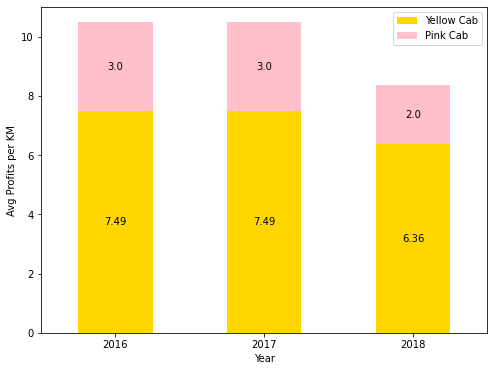

In [233]:
colors = {'Yellow Cab':'gold', 'Pink Cab':'pink'}  

ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Year', ylabel='Avg Profits per KM', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

1693009.84
2061973.4449999998
1560162.189


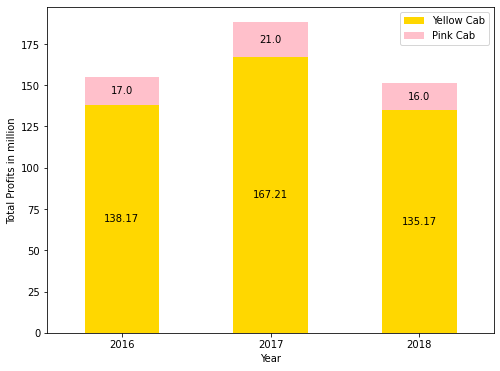

In [234]:

#profits by year

y_p_16 = 1/100000*np.sum((y_16[["Price Charged"]].to_numpy()-  y_16[["Cost of Trip"]].to_numpy()))
y_p_17 = 1/100000*np.sum((y_17[["Price Charged"]].to_numpy()-  y_17[["Cost of Trip"]].to_numpy()))
y_p_18 = 1/100000*np.sum((y_18[["Price Charged"]].to_numpy()-  y_18[["Cost of Trip"]].to_numpy()))





p_p_16 = 1/100000*np.sum((p_16[["Price Charged"]].to_numpy()-  p_16[["Cost of Trip"]].to_numpy()))
p_p_17 = 1/100000*np.sum((p_17[["Price Charged"]].to_numpy()-  p_17[["Cost of Trip"]].to_numpy()))
p_p_18 = 1/100000*np.sum((p_18[["Price Charged"]].to_numpy()-  p_18[["Cost of Trip"]].to_numpy()))


print(np.sum((p_16[["Price Charged"]].to_numpy()-  p_16[["Cost of Trip"]].to_numpy())))
print(np.sum((p_17[["Price Charged"]].to_numpy()-  p_17[["Cost of Trip"]].to_numpy())))
print(np.sum((p_18[["Price Charged"]].to_numpy()-  p_18[["Cost of Trip"]].to_numpy())))



A = [round(y_p_16,2), round(y_p_17,2), round(y_p_18,2)]
B = [round(p_p_16), round(p_p_17), round(p_p_18)]

df = pd.DataFrame(data={'Yellow Cab': A, 'Pink Cab': B})
df.index = ['2016', '2017', '2018']


colors = {'Yellow Cab':'gold', 'Pink Cab':'pink'}  
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Year', ylabel='Total Profits in million', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

In [235]:
percentage_change=(2061973-1693009)/1693009

print(percentage_change*100)

21.79338680420482


::::::::trend plot::::::::::::

/var/folders/v0/c7gvrc_919bgy_fxmbsq_0lw0000gn/T/ipykernel_7834/2466655328.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:g" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(y2, 'o:g', linestyle=':', linewidth='8',color="pink")
/var/folders/v0/c7gvrc_919bgy_fxmbsq_0lw0000gn/T/ipykernel_7834/2466655328.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o:g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(y2, 'o:g', linestyle=':', linewidth='8',color="pink")


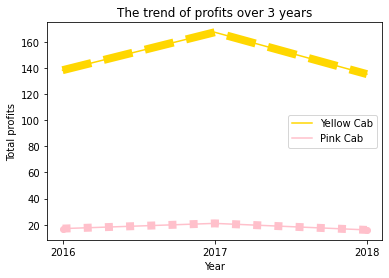

In [236]:

  
  
# Creation of Data
x1 = ['2016', '2017', '2018']
y1 = [round(y_p_16,2), round(y_p_17,2), round(y_p_18,2)]
y2 =  [round(p_p_16), round(p_p_17), round(p_p_18)]

# Plotting the Data
plt.plot(x1, y1, label='Yellow Cab',color='gold')
plt.plot(x1, y2, label='Pink Cab',color='pink')
  
plt.xlabel('Year')
plt.ylabel('Total profits')
plt.title("The trend of profits over 3 years")
  
plt.plot(y1,  linestyle='--', linewidth='8',color="gold")
plt.plot(y2, 'o:g', linestyle=':', linewidth='8',color="pink")
  
plt.legend()

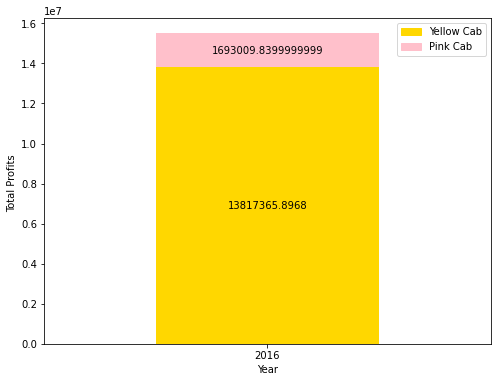

In [45]:

A = [y_p_16]
B = [p_p_16]

df = pd.DataFrame(data={'Yellow Cab': A, 'Pink Cab': B})
df.index = ['2016']




colors = {'Yellow Cab':'gold', 'Pink Cab':'pink'}   
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Year', ylabel='Total Profits ', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
colors = {'Yellow Cab':'gold', 'Pink Cab':'pink'}   
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

[5, 3, 24, 47, 5, 2, 28, 4, 1, 85, 2, 1, 0, 1, 9, 5, 4, 1, 40] [1, 1, 5, 9, 1, 1, 19, 2, 1, 13, 1, 0, 0, 1, 10, 2, 3, 0, 3]


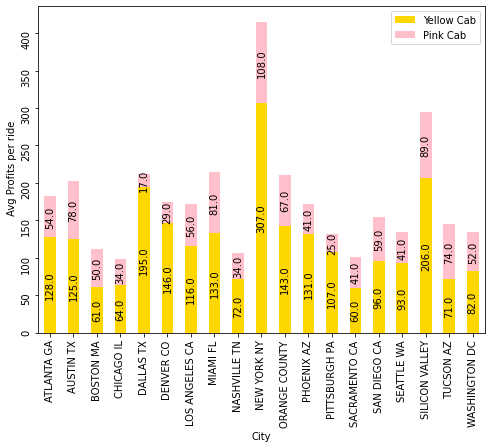

In [289]:
cities = pink_d['City'].unique().tolist()
A_c=[]
A_frequency=[]
B_c=[]
B_frequency=[]
for i in range(len(cities)):
    #select city by name then sum all the profits over that city
    city=cities[i]
    y_city=yellow_d[yellow_d.values  == city]
    A_frequency.append(int(len(y_city)/1000))
    #len_y_city is the num of rides in that city
    ycity_sum=np.mean((y_city[["Price Charged"]].to_numpy()-  y_city[["Cost of Trip"]].to_numpy()))
    A_c.append(int(ycity_sum))
    p_city=pink_d[pink_d.values  == city]
    B_frequency.append(int(len(p_city)/1000))
    pcity_sum=np.mean((p_city[["Price Charged"]].to_numpy()-  p_city[["Cost of Trip"]].to_numpy()))
    B_c.append(int(pcity_sum))

print(A_frequency,B_frequency)




df = pd.DataFrame(data={'Yellow Cab': A_c, 'Pink Cab': B_c})
df.index = cities



colors = {'Yellow Cab':'gold', 'Pink Cab':'pink'}  
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='City', ylabel=' Avg Profits per ride', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center',rotation=90)

    plt.yticks(rotation=90)
    plt.xticks(rotation=90)



In [291]:
cities = pink_d['City'].unique().tolist()
A_c=[]
A_frequency=[]
B_c=[]
B_frequency=[]
for i in range(len(cities)):
    #select city by name then sum all the profits over that city
    city=cities[i]
    y_city=yellow_d[yellow_d.values  == city]
    A_frequency.append(int(len(y_city)))
    #len_y_city is the num of rides in that city
    ycity_sum=np.mean((y_city[["Price Charged"]].to_numpy()-  y_city[["Cost of Trip"]].to_numpy()))
    A_c.append(int(ycity_sum))
    p_city=pink_d[pink_d.values  == city]
    B_frequency.append(int(len(p_city)))
    pcity_sum=np.mean((p_city[["Price Charged"]].to_numpy()-  p_city[["Cost of Trip"]].to_numpy()))
    B_c.append(int(pcity_sum))

print(A_frequency,B_frequency)
print(len(A_frequency))

"""
pink only has more customers in 4 cities
"""

[5795, 3028, 24506, 47264, 5637, 2431, 28168, 4452, 1169, 85918, 2469, 1200, 631, 1033, 9816, 5265, 4722, 1132, 40045] [1762, 1868, 5186, 9361, 1380, 1394, 19865, 2002, 1841, 13967, 1513, 864, 682, 1334, 10672, 2732, 3797, 799, 3692]
19


'\npink only has more customers in 4 cities\n'

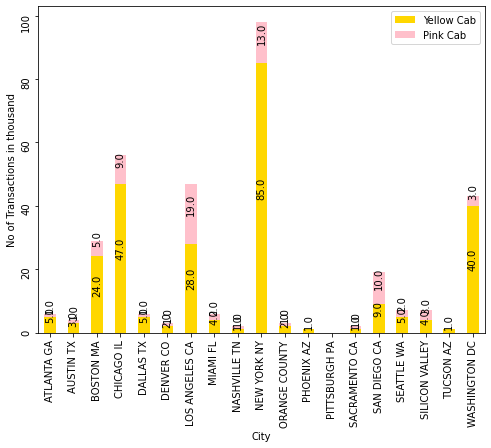

In [288]:
"""
City by frequency
"""

df = pd.DataFrame(data={'Yellow Cab': A_frequency, 'Pink Cab': B_frequency})
df.index = cities



colors = {'Yellow Cab':'gold', 'Pink Cab':'pink'}  
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='City', ylabel='No of Transactions in thousand', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center',rotation=90,padding=10)

    plt.yticks(rotation=90)
    plt.xticks(rotation=90)
    
    



In [115]:

A_c_mode=yellow_d["City"].mode()
B_c_mode=pink_d["City"].mode()

print(f" Yelllow is {A_c_mode}, B is {B_c_mode}")

 Yelllow is 0    NEW YORK NY
Name: City, dtype: object, B is 0    LOS ANGELES CA
Name: City, dtype: object


***
Analysis by customer base

percentage of profit contribution by gender

***


In [242]:
y_id=yellow_d["Transaction ID"].to_numpy().tolist()
y_cuid=[] #customer_id

id_file=pd.read_csv("Transaction_ID.csv")
print(f"there are {len(id_file)} transactions")
#find the customer id by transaction id

#~ to convert True to False remove transactions elong to yellow company
#there are 274681 pink transactions in total

print(f"there are {len(y_id)} yellow transactions")

#df=pd.read_csv('Cab_Data.csv')
gender=pd.read_csv("Customer_ID.csv")
print(f"there are {len(gender)} customers")
#p_female=p_gender.values
#

female=gender[gender.values=="Female"]
print(f"there are {len(female)} females in total")
male=p_gender[p_gender.values=="Male"]
print(f"there are {len(male)} males in total")

f_cid=female['Customer ID'].to_numpy().tolist()
f_tid=id_file[id_file["Customer ID"].isin(f_cid)]
f_tid=f_tid["Transaction ID"].to_numpy().tolist()

print(f"there are {len(f_tid)} transactions made by  female clients")
#find the data for 2016 females
pink_female=pink_d[pink_d["Transaction ID"].isin(f_tid)]
pink_male=pink_d[~pink_d["Transaction ID"].isin(f_tid)]
print(f"of which {len(pink_female)} is by the pink company female customers, abd   {len(pink_male)} is by male customers ")
#total profits earned from female clients in 2016


there are 440098 transactions
there are 274681 yellow transactions
there are 49171 customers
there are 22609 females in total
there are 26562 males in total
there are 183487 transactions made by  female clients
of which 37480 is by the pink company female customers, abd   47231 is by male customers 


In [249]:
"""
For the yellow company
"""

yellow_female=yellow_d[yellow_d["Transaction ID"].isin(f_tid)]
yellow_male=yellow_d[~yellow_d["Transaction ID"].isin(f_tid)]

print(f"female {len(yellow_female)} and male {len(yellow_male)}")

female 116000 and male 158681


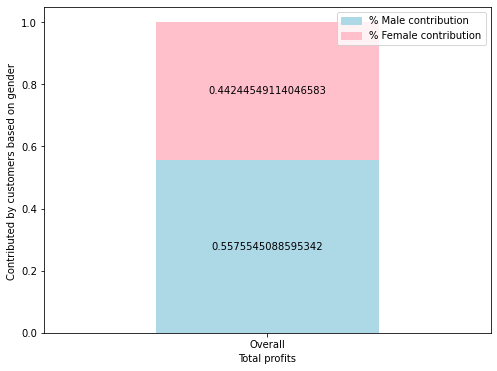

In [240]:

A = [len(pink_male)/84711]
B = [len(pink_female)/84711]

df = pd.DataFrame(data={'Male': A, 'Female': B})
df.index = ['Overall']




colors = {'Male':'lightblue', 'Female':'pink'}   
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Total profits', ylabel='Contributed by customers based on gender ', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
colors = {'% Male contribution':'lightblue', '% Female contribution':'pink'}   
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

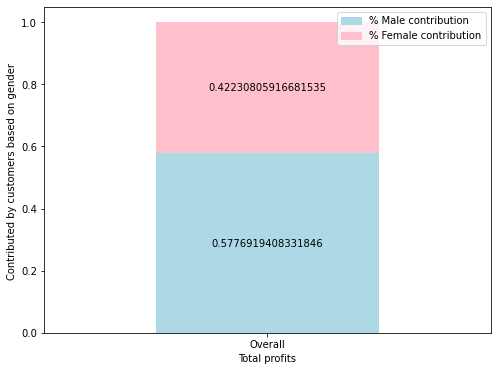

In [245]:
A = [len(yellow_male)/274681]
B = [len(yellow_female)/274681]

df = pd.DataFrame(data={'Male': A, 'Female': B})
df.index = ['Overall']




colors = {'Male':'lightblue', 'Female':'pink'}   
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, xlabel='Total profits', ylabel='Contributed by customers based on gender ', color=colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')
colors = {'% Male contribution':'lightblue', '% Female contribution':'pink'}   
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

       Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
3            28020    Male   23               23327
7            34106    Male   19               19980
20           59804    Male   31                4550
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[23335 rows x 4 columns]


Text(0.5, 1.0, 'Customer Density by Age for Yellow Cab Company in 2016')

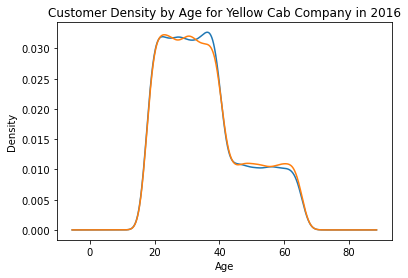

In [274]:
"""
2016  for yellow
"""

file=pd.read_csv("Transaction_ID.csv")

yellow_id=y_16["Transaction ID"].to_numpy().tolist()
#pink_male=pink_d[~pink_d["Transaction ID"].isin(f_tid)]
yellow_file=file[file["Transaction ID"].isin(yellow_id)]
yellow_cid=yellow_file["Customer ID"].to_numpy().tolist()
a_file=pd.read_csv("Customer_ID.csv")
age_file=a_file[~a_file["Customer ID"].isin(yellow_cid)]
print(age_file)


age_file.groupby('Gender').Age.plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Customer Density by Age for Yellow Cab Company in 2016")

       Customer ID  Gender  Age  Income (USD/Month)
3            28020    Male   23               23327
5            27318    Male   25               13984
6            33788    Male   23               23788
52           25949    Male   32               31491
53           24086    Male   60               19410
...            ...     ...  ...                 ...
49150        23382  Female   51               18919
49152        21420  Female   18                4531
49156        49888    Male   23                3226
49160        46456    Male   20               30662
49167        14971    Male   30               15346

[21701 rows x 4 columns]


Text(0.5, 1.0, '2018')

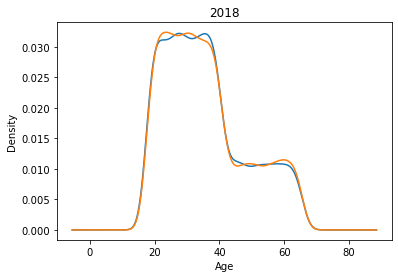

In [277]:
"""
2018for yellow
"""

file=pd.read_csv("Transaction_ID.csv")

yellow_id=y_18["Transaction ID"].to_numpy().tolist()
#pink_male=pink_d[~pink_d["Transaction ID"].isin(f_tid)]
yellow_file=file[file["Transaction ID"].isin(yellow_id)]
yellow_cid=yellow_file["Customer ID"].to_numpy().tolist()
a_file=pd.read_csv("Customer_ID.csv")
age_file=a_file[~a_file["Customer ID"].isin(yellow_cid)]
print(age_file)


age_file.groupby('Gender').Age.plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("2018")



       Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
2            28712    Male   53               11242
4            27182    Male   33                8536
5            27318    Male   25               13984
6            33788    Male   23               23788
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[30771 rows x 4 columns]


Text(0.5, 1.0, ' 2018')

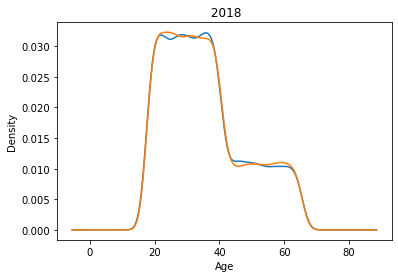

In [280]:

file=pd.read_csv("Transaction_ID.csv")

yellow_id=p_18["Transaction ID"].to_numpy().tolist()
#pink_male=pink_d[~pink_d["Transaction ID"].isin(f_tid)]
yellow_file=file[file["Transaction ID"].isin(yellow_id)]
yellow_cid=yellow_file["Customer ID"].to_numpy().tolist()
a_file=pd.read_csv("Customer_ID.csv")
age_file=a_file[~a_file["Customer ID"].isin(yellow_cid)]
print(age_file)


age_file.groupby('Gender').Age.plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title(" 2018")


In [299]:
df1=pd.read_csv('Cab_Data.csv')
df2=pd.read_csv('City.csv')
df3=pd.read_csv('Transaction_ID.csv')
df4=pd.read_csv('Customer_ID.csv')
len_sum=len(df4)
print(df4)
print(f"Total number of observations is {len_sum}")

       Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]
Total number of observations is 49171



EDA recommendation and hypothesis results 
 
 
 After analyzing different data sets about two companies, I have concluded that Yellow Cab company is more worthwhile of investing in for the following reasons:
Profit-wise advantages:
Yellow Cab Company’s profit per transaction is 60% higher than that of Pink Cab Company.
Yellow Cab Company’s profit loss rate is lower than that of Pink Cab Company.
Yellow Cab Company has more customers in most cities whereas Pink cab company only has more customers in 4 cities.
Customer-wise advantages:
Yellow Cab Company  has more customers overall.
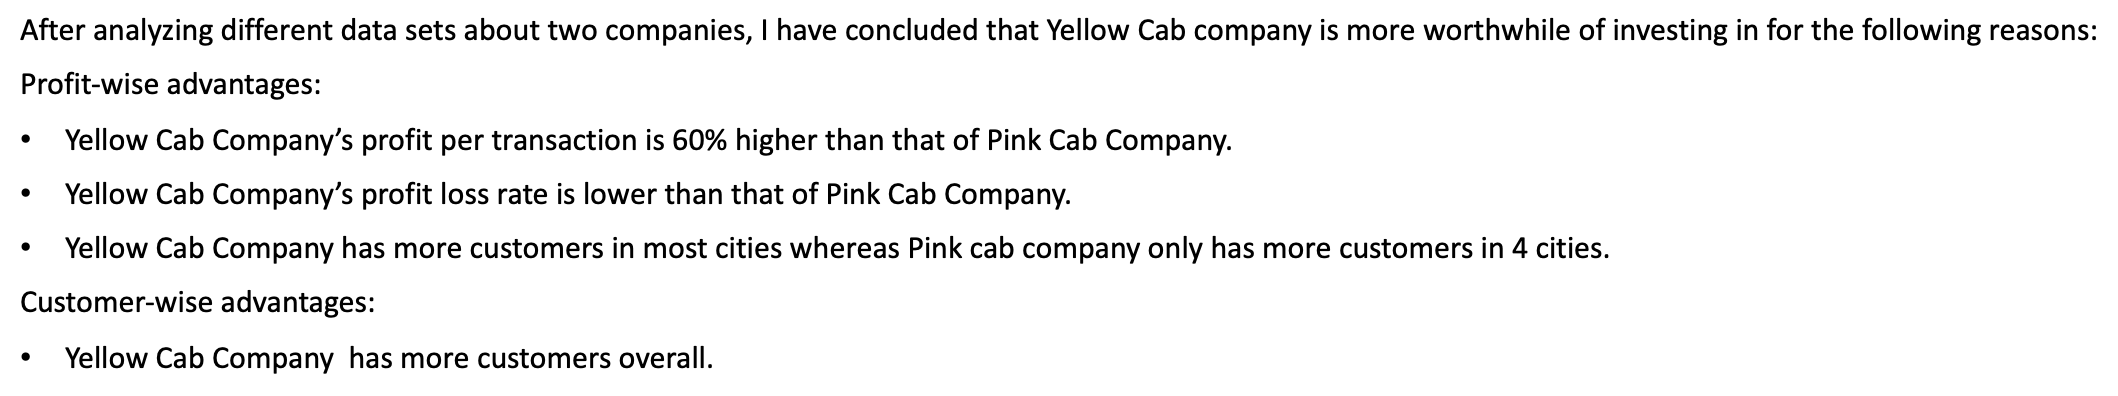